In [1]:
pip install wordcloud

In [2]:
#importamos las librerias a usar

import pandas as pd
import spacy
import spacy.cli
import re

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
chunk_size = 10000  # Define el tamaño del fragmento que deseas procesar a la vez

# Inicializa una lista para almacenar los fragmentos
df = []
column_names = ["Columna1","ID","FECHA","QUERY","USER","TWEET"]
# Iterar a través del archivo CSV en fragmentos de tamaño chunk_size y tambien vamos a obviar las lineas con errores
for chunk in pd.read_csv('tw_source.csv', chunksize=chunk_size,error_bad_lines=False,encoding='ISO-8859-1',names=column_names,sep=","):
   
    df.append(chunk)
final_df = pd.concat(df, ignore_index=True)

C:\Users\salvador.recinos\AppData\Local\Temp\ipykernel_6960\1423210881.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  for chunk in pd.read_csv('tw_source.csv', chunksize=chunk_size,error_bad_lines=False,encoding='ISO-8859-1',names=column_names,sep=","):
Skipping line 5804: expected 6 fields, saw 7
Skipping line 5841: expected 6 fields, saw 7
Skipping line 7077: expected 6 fields, saw 7

Skipping line 14892: expected 6 fields, saw 8

Skipping line 20800: expected 6 fields, saw 7
Skipping line 23232: expected 6 fields, saw 7
Skipping line 29981: expected 6 fields, saw 8

Skipping line 32686: expected 6 fields, saw 7
Skipping line 32966: expected 6 fields, saw 7
Skipping line 33311: expected 6 fields, saw 7
Skipping line 33717: expected 6 fields, saw 8
Skipping line 39472: expected 6 fields, saw 8

Skipping line 44602: expected 6 fields, saw 8
Skipping line 47649: expected 6 fields, saw 7
S

In [4]:
#observamos el dataset
final_df


,Columna1,ID,FECHA,QUERY,USER,TWEET
0,"0,""1467810369"",""Mon Apr 06 22:19:45 PDT 2009"",...",NaN,NaN,NaN,NaN,NaN
1,"0,""1467810672"",""Mon Apr 06 22:19:49 PDT 2009"",...",NaN,NaN,NaN,NaN,NaN
2,"0,""1467810917"",""Mon Apr 06 22:19:53 PDT 2009"",...",NaN,NaN,NaN,NaN,NaN
3,"0,""1467811184"",""Mon Apr 06 22:19:57 PDT 2009"",...",NaN,NaN,NaN,NaN,NaN
4,"0,""1467811193"",""Mon Apr 06 22:19:57 PDT 2009"",...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1047604,;;;;;;;;;;;;;;;;;;;;;,NaN,NaN,NaN,NaN,NaN
1047605,;;;;;;;;;;;;;;;;;;;;;,NaN,NaN,NaN,NaN,NaN
1047606,;;;;;;;;;;;;;;;;;;;;;,NaN,NaN,NaN,NaN,NaN
1047607,;;;;;;;;;;;;;;;;;;;;;,NaN,NaN,NaN,NaN,NaN


In [5]:
#realizamos los corpus para cada variables
corpus_user = final_df["USER"]
corpus_tweet= final_df["TWEET"]
corpus_id= final_df["ID"]
corpus_fecha= final_df["FECHA"]

In [26]:
def normalizacion(corpus):
    newCorpus = []
    for doc in corpus:
        # Verifica si el elemento es una cadena de texto antes de realizar la normalización
        if isinstance(doc, str):
            # Elimina caracteres no deseados y convierte a minúsculas
            normalized_doc = re.sub(r'[^a-zA-Z0-9áéíóúüñÁÉÍÓÚ ]', '', doc).lower()
            newCorpus.append(normalized_doc)
    return newCorpus

In [7]:
#funcion de normalizacion
def mantener_numeros(corpus):
    newCorpus = []
    for doc in corpus:
        # Verifica si el elemento es una cadena de texto antes de realizar la normalización
        if isinstance(doc, str):
            # Utiliza una expresión regular para eliminar todo lo que no sean números
            numeros = re.sub(r'[^0-9]', '', doc)
            newCorpus.append(numeros)
    return newCorpus

In [27]:
#normalizamos
corpus_norm_user = normalizacion(corpus_user)
corpus_norm_tweet = normalizacion(corpus_tweet)
corpus_norm_id = mantener_numeros(corpus_id)
corpus_norm_fecha = normalizacion(corpus_fecha)

In [28]:
corpus_norm_tweet

['jpfurry poor john  this is what happens when you play with fruit and a microwave seriously though have you seen a doctor xxx',
 'i think to much on the past i cant change it i deserved so much more then wat i got but why am i still thinking about him  gah',
 'in bed i suddenly feel  i wish ma was here wme goodnight twitterfam',
 'ate too many oreos yesterday feel very sick today ',
 'of to the hospital for an xray ',
 'nishafoo i miss you too ',
 'oh my god internet explorer 6 and 7 i just dont understand you guys ',
 'soooo not looking forward to my solicitors appt this afternoon ',
 'to the theatre again determined to see more than the last 40 minutes of the show today 1st act sounds hilarious but have yet to see it ',
 'shantiadonte no  baby got sick right before from his cousins birthday party  i heard it was fiya though',
 'steinsgrrl sarah and i think it looks like something from a horror movieso creepy   im emailing you right now',
 'timelady thats a real bummer ',
 'homework 

In [9]:
spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [10]:
nlp = spacy.load("es_core_news_sm")

In [29]:
#funcion de tokenizacion
def tokenizacion(corpus):
       newCorpus = []
       for doc in corpus:
              newCorpus.append(nlp(doc))
       return newCorpus

In [30]:
#hacemos los token para cada corpus
corpus_tokenization_user = tokenizacion(corpus_norm_user)
corpus_tokenization_tweet = tokenizacion(corpus_norm_tweet)
corpus_tokenization_id = tokenizacion(corpus_norm_id)
corpus_tokenization_fecha = tokenizacion(corpus_norm_fecha)

In [31]:
#funcion de remover palabras stop
def removeStops(corpus):
       newCorpus = []
       for doc in corpus:
              s = ''
              for token in doc:
                     if(token.is_stop == False):
                            s = s + token.text + ' '
              newCorpus.append(s.strip())
       return newCorpus

In [32]:
#quitamos las palabras stop
corpus_no_stops_user = removeStops(corpus_tokenization_user)
corpus_no_stops_tweet = removeStops(corpus_tokenization_tweet)
corpus_no_stops_id = removeStops(corpus_tokenization_id)
corpus_no_stops_fecha = removeStops(corpus_tokenization_fecha)

In [33]:
#funcion de stemming
def stemmingLemmating(corpus):
       documents = tokenizacion(corpus)
       newDocs = []
       for doc in documents:
              s = ''
              for token in doc:
                     s = s + token.lemma_ + ' '
              newDocs.append(s.strip())
       return newDocs

In [34]:
#stemming y lemmating para cada corpus
corpus_stemm_lemm_user = stemmingLemmating(corpus_no_stops_user)
corpus_stemm_lemm_tweet = stemmingLemmating(corpus_no_stops_tweet)
corpus_stemm_lemm_id = stemmingLemmating(corpus_no_stops_id)
corpus_stemm_lemm_fecha = stemmingLemmating(corpus_no_stops_fecha)

In [35]:
#dejamos los corpus del mismo tamaño para poder unirlos en un df
max_length = max(len(corpus_stemm_lemm_user), len(corpus_stemm_lemm_tweet), len(corpus_stemm_lemm_id), len(corpus_stemm_lemm_fecha))
# Completa las listas con valores nulos si son más cortas que la longitud máxima
corpus_stemm_lemm_user += [None] * (max_length - len(corpus_stemm_lemm_user))
corpus_stemm_lemm_tweet += [None] * (max_length - len(corpus_stemm_lemm_tweet))
corpus_stemm_lemm_id += [None] * (max_length - len(corpus_stemm_lemm_id))
corpus_stemm_lemm_fecha += [None] * (max_length - len(corpus_stemm_lemm_fecha))

In [36]:
# dataframe con procesos realizados
data = {
    'USER': corpus_stemm_lemm_user,
    'TWEET': corpus_stemm_lemm_tweet,
    'ID': corpus_stemm_lemm_id,
    'FECHA': corpus_stemm_lemm_fecha
}

# Crear el DataFrame df_procesado
df_procesado = pd.DataFrame(data)

In [37]:
#vemos el dataset
df_procesado

,USER,TWEET,ID,FECHA
0,lisaherrity,jpfurry poor john this is what happens when...,,mon apr 06 223620 pdt 2009
1,steponme2418,i think to much on the past i cant change it i...,1467874103,mon apr 06 223652 pdt 2009
2,iams,in bed i suddenly feel i wish ma was here w...,1467876016,dangit
3,leppardettir,ir tú too many oreos yesterday feel very sick ...,,and quotwin datar with tad hamiltonquot oh gaw...
4,faniel,of to the hospital for an xray,,mon apr 06 232504 pdt 2009
...,...,...,...,...
7651,None,None,1468054221,None
7652,None,None,,None
7653,None,None,,None
7654,None,None,,None


In [38]:
#quitamos valores nulos
df_sin_nulos = df_procesado.dropna(how='all')
df_sin_nulos = df_sin_nulos.dropna(subset=['TWEET'])



In [39]:
#vemos los top usuarios con más menciones
top_users = df_sin_nulos['USER'].value_counts().head(3).index.tolist()
top_users

['lostdog', 'etc', 'wangsanata']

In [42]:
#CORPUS PARA DESCRIBIR CADA TWEET DE CADA USER 
user1_corpus = df_sin_nulos[df_sin_nulos['USER'] == 'lostdog'][['TWEET', 'ID', 'FECHA']].copy()
user2_corpus = df_sin_nulos[df_sin_nulos['USER'] == 'etc'][['TWEET', 'ID', 'FECHA']].copy()
user3_corpus = df_sin_nulos[df_sin_nulos['USER'] == 'wangsanata'][['TWEET', 'ID', 'FECHA']].copy()

In [48]:
# Calcular la longitud de cada tweet y agregarla como una nueva columna
user1_corpus['Length'] = user1_corpus['TWEET'].apply(len)
user2_corpus['Length'] = user2_corpus['TWEET'].apply(len)
user3_corpus['Length'] = user3_corpus['TWEET'].apply(len)

In [52]:
pd.set_option('display.max_colwidth', None)

In [53]:
#PARA USER lostdog
user1_corpus


,TWEET,ID,FECHA,Length
321,parent makin go to bed bc church tomorrow couldnt play call of duty 4 w him bc his disc was messed up,1573886875,almost losing my bberry and sigh big gambling winnings,101
334,is awakir why am i not sleeping,2,sun may 17 235913 pdt 2009,34
478,davey took everything,,now,21
800,missing one of the greatest golf events of the year upp north,,mon jun 01 052224 pdt 2009,64


In [54]:
#PARA USER etc
user2_corpus


,TWEET,ID,FECHA,Length
21,going bk home 2day wish i hadnt drank so much last night,,but its bad for biz,59
108,ok since onar tweeted ill do mercy trivia,,haru,44
650,still news sorry guys,1695405213,yet i was frustrated ne way,21
1059,philvirir im sorry phillip i didnt know about it until palomo said that we were going to in n out completely spontaneous,,fri jun 05 093552 pdt 2009,123


In [56]:
#para user wangsanata
user3_corpus



,TWEET,ID,FECHA,Length
253,smackdown and just found out i have to freaking work during extreme rul,,thu may 14 002047 pdt 2009,71
517,monicananz i hate you,,and i will give you restquot,21


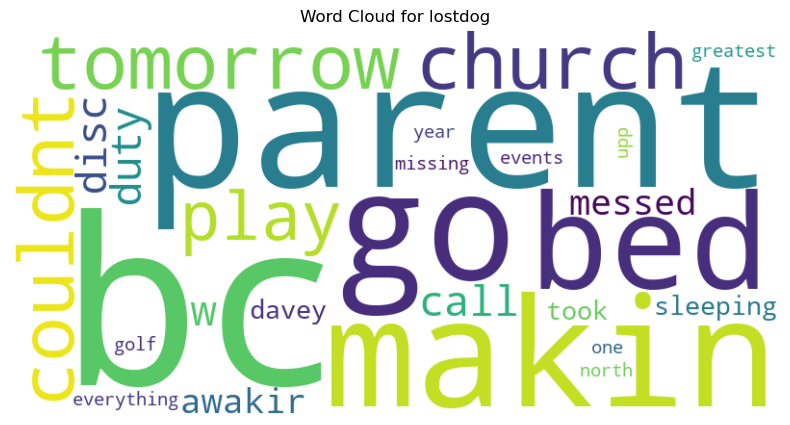

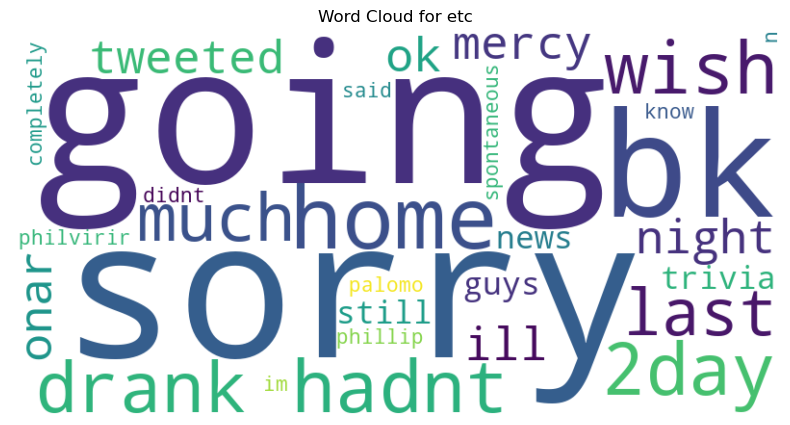

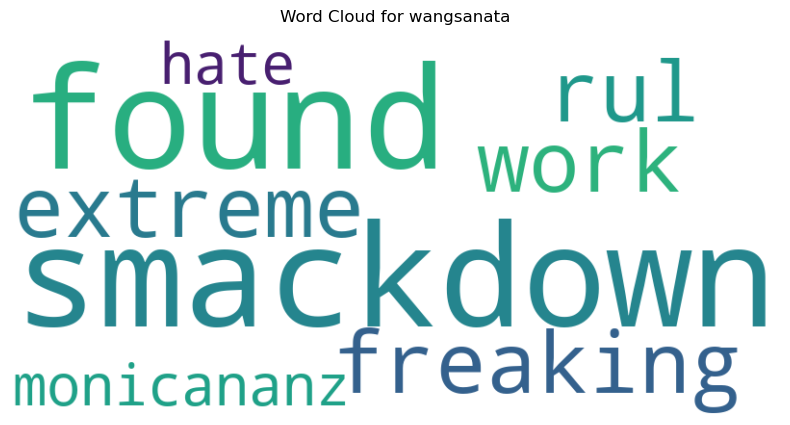

In [40]:
#funcion para worldcloud

top_users = ['lostdog', 'etc', 'wangsanata']  # Reemplaza con los nombres de usuario reales

# Itera a través de los usuarios
for user in top_users:
    # Filtra los tweets del usuario
    user_tweets = df_sin_nulos[df_sin_nulos['USER'] == user]['TWEET'].tolist()
    
    # Convierte la lista de tweets en un solo texto
    user_text = ' '.join(user_tweets)
    
    # Crea un objeto WordCloud para el usuario actual
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_text)
    
    # Muestra la nube de palabras en una ventana
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {user}')
    plt.axis('off')
    plt.show()


In [57]:
#resultado y contexto
#para el usuario lost dog  es que los papas lo mandaron a dormir porque no a dormido bien por estar jugando
#para el usuario etc es que el bebió mucho una noche antes y dijo cosas que no debería , y se esta disculpando
# para el usuario wangsanata le gusta ver la wwe y luego tuvo un ataque de ira XD

### Problema 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [2]:
train = pd.read_csv("train.csv")
train.head()
train.shape

(42000, 785)

In [3]:
y_train_ann = train['label'].astype('float32')
X_train_ann = train.drop(['label'], axis=1).astype('int32')

y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')

In [4]:
# Normalizacion
X_train_ann = X_train/255

X_train = X_train/255

In [5]:
#reshape 
X_train_ann = X_train_ann.values.reshape(-1,28,28,1)

X_train = X_train.values.reshape(-1,28,28,1)

In [6]:
# one-hot encoding
y_train_ann = to_categorical(y_train_ann, num_classes = 10)

y_train = to_categorical(y_train, num_classes = 10)
y_train.shape
from sklearn.model_selection import train_test_split

In [7]:
#ann 
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_train_ann, y_train_ann, test_size = 0.3, random_state=42)

#convolucional
X_train, X_test_cv, y_train, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

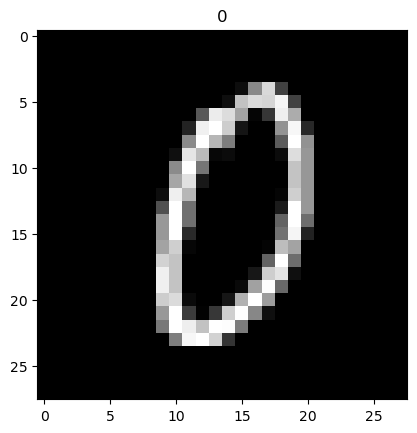

In [9]:
plt.imshow(X_train_ann[1][:,:,0], cmap='gray')
plt.title(y_train_ann[1].argmax());

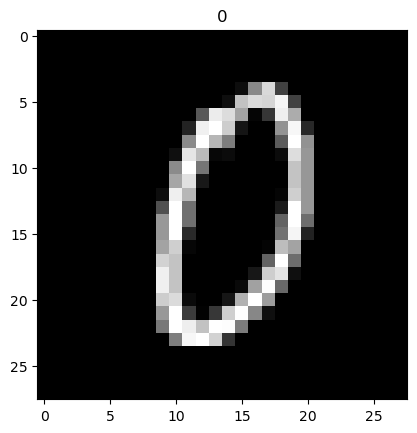

In [10]:
plt.imshow(X_train[1][:,:,0], cmap='gray')
plt.title(y_train[1].argmax());

In [11]:
## Red neuronal artificial
X_train_ann.shape
input_shape_ann = (28,28,1)
X_input_ann = Input(input_shape_ann)

model_ann = Sequential()
model_ann.add(Flatten(input_shape=input_shape_ann))
model_ann.add(Dense(784, activation='relu', input_dim=2))
model_ann.add(Dense(10, activation='softmax'))

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_fit = model_ann.fit(X_train_ann,y_train_ann, batch_size=100, epochs=100)
evaluation_ann = model_ann.evaluate(X_test_ann, y_test_ann)
print("Pérdida (test):", evaluation_ann[0])
print("Precisión (test):", evaluation_ann[1])

Epoch 1/100
294/294 [==============================] - 3s 9ms/step - loss: 0.3112 - accuracy: 0.9104
Epoch 2/100
294/294 [==============================] - 2s 8ms/step - loss: 0.1300 - accuracy: 0.9626
Epoch 3/100
294/294 [==============================] - 2s 7ms/step - loss: 0.0819 - accuracy: 0.9760
Epoch 4/100
294/294 [==============================] - 2s 8ms/step - loss: 0.0564 - accuracy: 0.9839
Epoch 5/100
294/294 [==============================] - 2s 7ms/step - loss: 0.0397 - accuracy: 0.9885
Epoch 6/100
294/294 [==============================] - 2s 8ms/step - loss: 0.0252 - accuracy: 0.9936
Epoch 7/100
294/294 [==============================] - 2s 8ms/step - loss: 0.0192 - accuracy: 0.9955
Epoch 8/100
294/294 [==============================] - 2s 8ms/step - loss: 0.0142 - accuracy: 0.9969
Epoch 9/100
294/294 [==============================] - 2s 8ms/step - loss: 0.0112 - accuracy: 0.9972
Epoch 10/100
294/294 [==============================] - 2s 7ms/step - loss: 0.0095 - accura

In [13]:
## Red neuronal convolucional
# Creando el modelo
input_shape = (28,28,1)
X_input = Input(input_shape)

# capa 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# capa 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# capa 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()


Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 maxPool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 32)        18464     
                                                           

In [15]:
#compile y fit del modelo 
#Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test_cv,y_test_cv))


Epoch 1/10
294/294 [==============================] - 35s 111ms/step - loss: 0.7021 - accuracy: 0.7701 - val_loss: 4.4835 - val_accuracy: 0.1102
Epoch 2/10
294/294 [==============================] - 33s 113ms/step - loss: 0.1700 - accuracy: 0.9506 - val_loss: 0.1181 - val_accuracy: 0.9648
Epoch 3/10
294/294 [==============================] - 33s 113ms/step - loss: 0.1161 - accuracy: 0.9672 - val_loss: 0.0740 - val_accuracy: 0.9791
Epoch 4/10
294/294 [==============================] - 33s 112ms/step - loss: 0.0924 - accuracy: 0.9752 - val_loss: 0.0634 - val_accuracy: 0.9821
Epoch 5/10
294/294 [==============================] - 32s 111ms/step - loss: 0.0766 - accuracy: 0.9793 - val_loss: 0.0458 - val_accuracy: 0.9878
Epoch 6/10
294/294 [==============================] - 33s 113ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0716 - val_accuracy: 0.9802
Epoch 7/10
294/294 [==============================] - 33s 113ms/step - loss: 0.0609 - accuracy: 0.9828 - val_loss: 0.0460 - val_ac

In [17]:
# compile y fit con SGD
sgd = SGD(learning_rate=0.0005, momentum=0.5, weight_decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=12, validation_data=(X_test_cv, y_test_cv))
evaluation = conv_model.evaluate(X_test_cv, y_test_cv)


Epoch 1/12
919/919 [==============================] - 38s 41ms/step - loss: 0.0304 - accuracy: 0.9927 - val_loss: 0.0353 - val_accuracy: 0.9902
Epoch 2/12
919/919 [==============================] - 41s 44ms/step - loss: 0.0273 - accuracy: 0.9928 - val_loss: 0.0351 - val_accuracy: 0.9909
Epoch 3/12
919/919 [==============================] - 39s 42ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 4/12
919/919 [==============================] - 48s 52ms/step - loss: 0.0239 - accuracy: 0.9938 - val_loss: 0.0350 - val_accuracy: 0.9913
Epoch 5/12
919/919 [==============================] - 48s 52ms/step - loss: 0.0242 - accuracy: 0.9936 - val_loss: 0.0346 - val_accuracy: 0.9910
Epoch 6/12
919/919 [==============================] - 43s 47ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 7/12
919/919 [==============================] - 43s 47ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.0347 - val_accuracy:

In [19]:
print("Pérdida ANN (test):", evaluation_ann[0])
print("Precisión ANN (test):", evaluation_ann[1])

print("Pérdida Modelo CV (test):", evaluation[0])
print("Precisión Modelo CV (test):", evaluation[1])

Pérdida ANN (test): 0.13558852672576904
Precisión ANN (test): 0.9799206256866455
Pérdida Modelo CV (test): 0.03493838012218475
Precisión Modelo CV (test): 0.991428554058075


Tanto la perdida como la presicion del modelo convolucional son mejores que los resultados obtenidos en la ANN. <br>